In [2]:
import pandas as pd
import numpy as np
import sqlite3
from sqlite3 import Error

## Using pandas

In [3]:
cols = ['Year',
    'Quarter',
    'Month',
    'DayofMonth',
    'DayOfWeek',
    'FlightDate',
    'DOT_ID_Reporting_Airline',
    'IATA_CODE_Reporting_Airline',
    'Tail_Number',
    'Flight_Number_Reporting_Airline',
    'OriginAirportID',
    'DestAirportID',
    'CRSDepTime',
    'DepTime',
    'DepDelay',
    'DepDelayMinutes',
    'CRSArrTime',
    'ArrTime',
    'ArrDelay',
    'ArrDelayMinutes',
    'Cancelled',
    'CancellationCode',
    'Diverted',
    'CRSElapsedTime',
    'ActualElapsedTime',
    'AirTime',
    'Flights',
    'Distance',
    'CarrierDelay',
    'WeatherDelay',
    'NASDelay',
    'SecurityDelay',
    'LateAircraftDelay'
]

In [4]:
df = pd.read_csv("../../datasets/delays.csv", nrows=4, names=cols)

In [5]:
df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,...,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2014,1,1,30,4,2014-01-30,19805,AA,N006AA,2377,...,75,76,56,1,328,0,0,0,0,0
1,2014,1,1,31,5,2014-01-31,19805,AA,N003AA,2377,...,75,84,54,1,328,11,0,9,0,0
2,2014,1,1,1,3,2014-01-01,19805,AA,N002AA,2377,...,85,78,57,1,328,0,0,0,0,0
3,2014,1,1,2,4,2014-01-02,19805,AA,N002AA,2377,...,85,79,53,1,328,0,0,0,0,0


## Using sqlite

In [6]:
### download the db from link in readme
db_path = "../../dbs/delays.db"

In [7]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        connection.text_factory = str
    except Error as e:
        print("Error occurred: " + str(e))
    return connection


def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        if query == "":
            return "Query Blank"
        else:
            df = pd.read_sql_query(query, connection)
            return df
    except Error as e:
        return "Error occurred: " + str(e)

In [8]:
connection = create_connection(db_path)

In [9]:
sample_query = \
    """
        select * 
        from delay 
        limit 10;
    """

execute_query(connection, sample_query)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,...,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2014,1,1,30,4,2014-01-30,19805,AA,N006AA,2377,...,75,76,56,1,328,0,0,0,0,0
1,2014,1,1,31,5,2014-01-31,19805,AA,N003AA,2377,...,75,84,54,1,328,11,0,9,0,0
2,2014,1,1,1,3,2014-01-01,19805,AA,N002AA,2377,...,85,78,57,1,328,0,0,0,0,0
3,2014,1,1,2,4,2014-01-02,19805,AA,N002AA,2377,...,85,79,53,1,328,0,0,0,0,0
4,2014,1,1,3,5,2014-01-03,19805,AA,N014AA,2377,...,85,75,52,1,328,0,0,0,0,0
5,2014,1,1,4,6,2014-01-04,19805,AA,N010AA,2377,...,85,80,57,1,328,0,0,0,0,0
6,2014,1,1,5,7,2014-01-05,19805,AA,N011AA,2377,...,85,78,58,1,328,0,0,0,0,0
7,2014,1,1,6,1,2014-01-06,19805,AA,N002AA,2377,...,85,77,52,1,328,0,0,0,0,30
8,2014,1,1,7,2,2014-01-07,19805,AA,N012AA,2377,...,85,83,50,1,328,0,0,0,0,27
9,2014,1,1,8,3,2014-01-08,19805,AA,N014AA,2377,...,85,97,63,1,328,0,0,0,0,0


In [10]:
sample_query = \
    """
        select * 
        from delay 
        where Distance > 1000
        limit 10;
    """

execute_query(connection, sample_query)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,...,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2014,1,1,24,5,2014-01-24,19930,AS,N596AS,807,...,385,333,321,1,2681,0,0,0,0,0
1,2014,1,1,24,5,2014-01-24,19930,AS,N593AS,809,...,375,330,315,1,2562,0,0,0,0,0
2,2014,1,1,24,5,2014-01-24,19930,AS,N565AS,812,...,307,301,276,1,2355,0,0,0,0,0
3,2014,1,1,24,5,2014-01-24,19930,AS,N590AS,813,...,340,314,301,1,2378,0,0,0,0,0
4,2014,1,1,24,5,2014-01-24,19930,AS,N559AS,820,...,303,299,282,1,2404,0,0,0,0,0
5,2014,1,1,24,5,2014-01-24,19930,AS,N577AS,822,...,332,309,295,1,2562,0,0,0,0,0
6,2014,1,1,24,5,2014-01-24,19930,AS,N534AS,826,...,316,309,280,1,2378,0,0,0,0,0
7,2014,1,1,24,5,2014-01-24,19930,AS,N506AS,832,...,323,315,284,1,2417,0,0,0,0,0
8,2014,1,1,24,5,2014-01-24,19930,AS,N536AS,833,...,375,331,313,1,2603,0,0,0,0,0
9,2014,1,1,24,5,2014-01-24,19930,AS,N536AS,834,...,335,327,308,1,2603,0,0,0,0,0


In [11]:
sample_query = \
    """
        select * 
        from airport 
        limit 10;
    """

execute_query(connection, sample_query)

,Airport,AirportID,City,State,Elevation,Lat,Lon
0,ABE,10135,Allentown/Bethlehem/Easton,PA,393.0,40.652100,-75.440804
1,ABI,10136,Abilene,TX,1791.0,32.411301,-99.681900
2,ABQ,10140,Albuquerque,NM,5355.0,35.040199,-106.609001
3,ABR,10141,Aberdeen,SD,1302.0,45.449100,-98.421799
4,ABY,10146,Albany,GA,197.0,31.535500,-84.194504
5,ACK,10154,Nantucket,MA,47.0,41.253101,-70.060204
6,ACT,10155,Waco,TX,516.0,31.611300,-97.230499
7,ACV,10157,Arcata/Eureka,CA,221.0,40.978100,-124.109001
8,ACY,10158,Atlantic City,NJ,75.0,39.457600,-74.577202
9,ADK,10165,Adak Island,AK,18.0,51.877998,-176.645996


## Feature Selection
### Lasso Regularization
The LASSO method regularizes model parameters by shrinking the regression coefficients, reducing some of them to zero. The feature selection phase occurs after the shrinkage, where every non-zero value is selected to be used in the model.

#### Importing libraries and creating relevant functions

In [26]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

In [37]:
def prepare_data(df):
    #converting string variables to categorical
    df['IATA_CODE_Reporting_Airline'] = df['IATA_CODE_Reporting_Airline'].astype('category')
    df['IATA_CODE_Reporting_Airline'] = df['IATA_CODE_Reporting_Airline'].cat.codes
    
    df['Tail_Number'] = df['Tail_Number'].astype('category')
    df['Tail_Number'] = df['Tail_Number'].cat.codes
    
    #dropping columns with high correlation and response variables
    X = df.drop(["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay", "ArrDelay","DepDelay","DOT_ID_Reporting_Airline",\
              "CancellationCode", "FlightDate","DepDelayMinutes","ArrDelayMinutes","Cancelled","CRSElapsedTime","DepTime","CRSArrTime","ArrTime","CRSDepTime",\
                             "AirTime","ActualElapsedTime"],1)
    
    #response variables
    y_1 = df["ArrDelay"]
    y_2 = df["DepDelay"]
        
    return X, y_1, y_2

In [68]:
def lasso_model(X, y):
    #creating the lasso model
    #source: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
    reg = LassoCV()
    reg.fit(X, y)
    print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
    print("Best score using built-in LassoCV: %f" %reg.score(X, y))
    coef = pd.Series(reg.coef_, index = X.columns)
    imp_coef = coef.sort_values()
    import matplotlib
    matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using Lasso Model")

### 1. 2014 Data

In [13]:
sample_query = \
    """
        select *
        from delay 
        where year = 2014
    """

df_2014 = execute_query(connection, sample_query)

In [14]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819811 entries, 0 to 5819810
Data columns (total 33 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   Year                             int64 
 1   Quarter                          int64 
 2   Month                            int64 
 3   DayofMonth                       int64 
 4   DayOfWeek                        int64 
 5   FlightDate                       object
 6   DOT_ID_Reporting_Airline         int64 
 7   IATA_CODE_Reporting_Airline      object
 8   Tail_Number                      object
 9   Flight_Number_Reporting_Airline  object
 10  OriginAirportID                  int64 
 11  DestAirportID                    int64 
 12  CRSDepTime                       int64 
 13  DepTime                          int64 
 14  DepDelay                         int64 
 15  DepDelayMinutes                  int64 
 16  CRSArrTime                       int64 
 17  ArrTime                    

In [18]:
df_2014_small = df_2014.sample(frac=0.15, random_state=42)

In [19]:
df_2014_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872972 entries, 2608606 to 793311
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Year                             872972 non-null  int64 
 1   Quarter                          872972 non-null  int64 
 2   Month                            872972 non-null  int64 
 3   DayofMonth                       872972 non-null  int64 
 4   DayOfWeek                        872972 non-null  int64 
 5   FlightDate                       872972 non-null  object
 6   DOT_ID_Reporting_Airline         872972 non-null  int64 
 7   IATA_CODE_Reporting_Airline      872972 non-null  object
 8   Tail_Number                      870478 non-null  object
 9   Flight_Number_Reporting_Airline  872972 non-null  object
 10  OriginAirportID                  872972 non-null  int64 
 11  DestAirportID                    872972 non-null  int64 
 12  CRSDepTime

In [40]:
X_2014, y_2014_1, y_2014_2 = prepare_data(df_2014_small)

Feature Importance for Arrival Delays
Best alpha using built-in LassoCV: 1.423303
Best score using built-in LassoCV: 0.002536


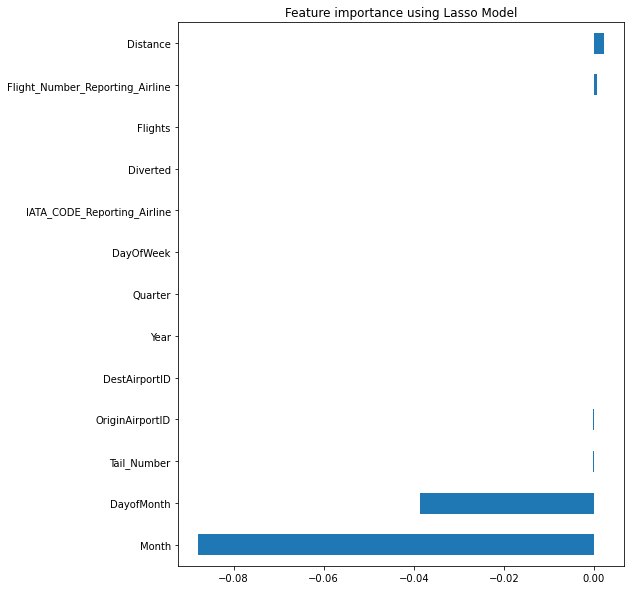

In [76]:
print("Feature Importance for Arrival Delays")
lasso_model(X_2014, y_2014_1)

Feature Importance for Depature Delays
Best alpha using built-in LassoCV: 1.914924
Best score using built-in LassoCV: 0.001946


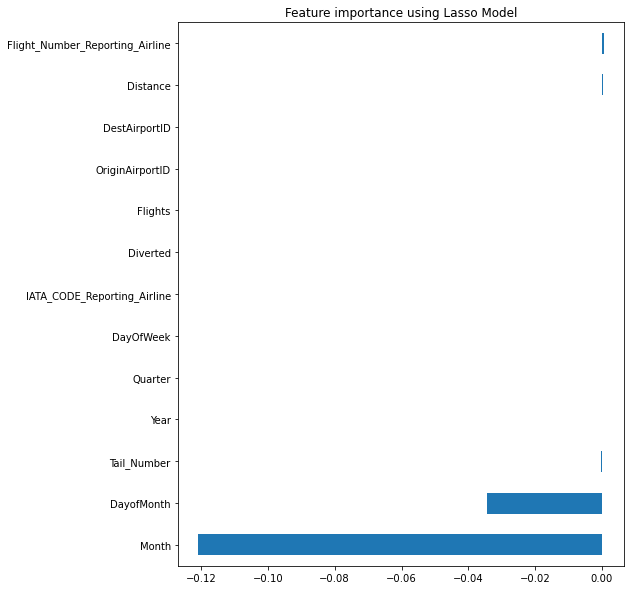

In [77]:
print("Feature Importance for Depature Delays")
lasso_model(X_2014, y_2014_2)

### 2. 2015 Data

In [46]:
sample_query = \
    """
        select *
        from delay 
        where year = 2015
    """

df_2015 = execute_query(connection, sample_query)

In [47]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 33 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   Year                             int64 
 1   Quarter                          int64 
 2   Month                            int64 
 3   DayofMonth                       int64 
 4   DayOfWeek                        int64 
 5   FlightDate                       object
 6   DOT_ID_Reporting_Airline         int64 
 7   IATA_CODE_Reporting_Airline      object
 8   Tail_Number                      object
 9   Flight_Number_Reporting_Airline  object
 10  OriginAirportID                  int64 
 11  DestAirportID                    int64 
 12  CRSDepTime                       int64 
 13  DepTime                          int64 
 14  DepDelay                         int64 
 15  DepDelayMinutes                  int64 
 16  CRSArrTime                       int64 
 17  ArrTime                    

In [48]:
df_2015_small = df_2015.sample(frac=0.15, random_state=42)

In [50]:
df_2015_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872862 entries, 1508570 to 1409694
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Year                             872862 non-null  int64 
 1   Quarter                          872862 non-null  int64 
 2   Month                            872862 non-null  int64 
 3   DayofMonth                       872862 non-null  int64 
 4   DayOfWeek                        872862 non-null  int64 
 5   FlightDate                       872862 non-null  object
 6   DOT_ID_Reporting_Airline         872862 non-null  int64 
 7   IATA_CODE_Reporting_Airline      872862 non-null  object
 8   Tail_Number                      870613 non-null  object
 9   Flight_Number_Reporting_Airline  872862 non-null  object
 10  OriginAirportID                  872862 non-null  int64 
 11  DestAirportID                    872862 non-null  int64 
 12  CRSDepTim

In [51]:
X_2015, y_2015_1, y_2015_2 = prepare_data(df_2015_small)

Feature Importance for Arrival Delays
Best alpha using built-in LassoCV: 0.798374
Best score using built-in LassoCV: 0.001804


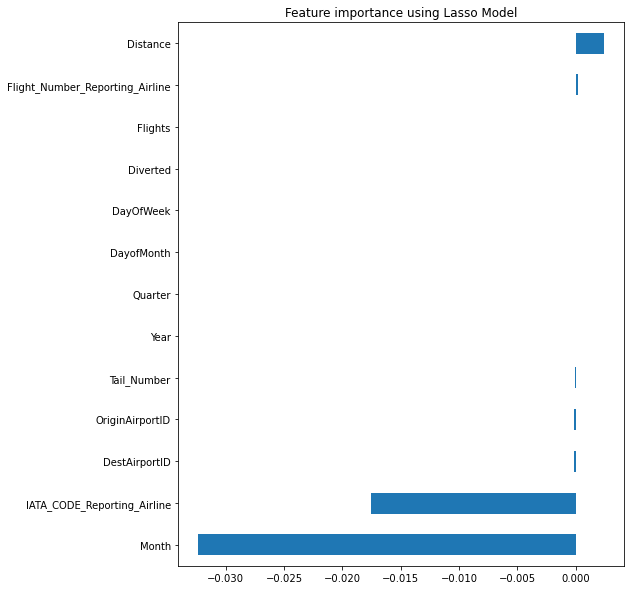

In [79]:
print("Feature Importance for Arrival Delays")
lasso_model(X_2015, y_2015_1)

Feature Importance for Depature Delays
Best alpha using built-in LassoCV: 0.390644
Best score using built-in LassoCV: 0.000588


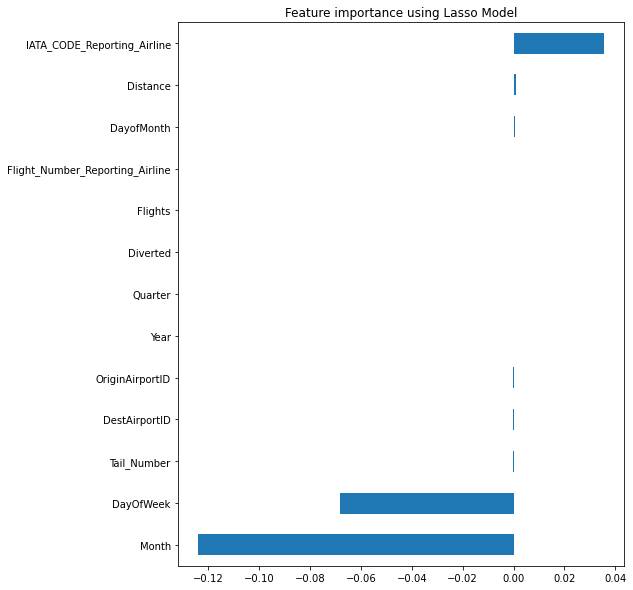

In [80]:
print("Feature Importance for Depature Delays")
lasso_model(X_2015, y_2015_2)

### 3. 2017 Data

In [54]:
sample_query = \
    """
        select *
        from delay 
        where year = 2017
    """

df_2017 = execute_query(connection, sample_query)

In [55]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674621 entries, 0 to 5674620
Data columns (total 33 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   Year                             int64 
 1   Quarter                          int64 
 2   Month                            int64 
 3   DayofMonth                       int64 
 4   DayOfWeek                        int64 
 5   FlightDate                       object
 6   DOT_ID_Reporting_Airline         int64 
 7   IATA_CODE_Reporting_Airline      object
 8   Tail_Number                      object
 9   Flight_Number_Reporting_Airline  object
 10  OriginAirportID                  int64 
 11  DestAirportID                    int64 
 12  CRSDepTime                       int64 
 13  DepTime                          int64 
 14  DepDelay                         int64 
 15  DepDelayMinutes                  int64 
 16  CRSArrTime                       int64 
 17  ArrTime                    

In [56]:
df_2017_small = df_2017.sample(frac=0.15, random_state=42)

In [57]:
df_2017_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851193 entries, 150403 to 2091305
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Year                             851193 non-null  int64 
 1   Quarter                          851193 non-null  int64 
 2   Month                            851193 non-null  int64 
 3   DayofMonth                       851193 non-null  int64 
 4   DayOfWeek                        851193 non-null  int64 
 5   FlightDate                       851193 non-null  object
 6   DOT_ID_Reporting_Airline         851193 non-null  int64 
 7   IATA_CODE_Reporting_Airline      851193 non-null  object
 8   Tail_Number                      849288 non-null  object
 9   Flight_Number_Reporting_Airline  851193 non-null  object
 10  OriginAirportID                  851193 non-null  int64 
 11  DestAirportID                    851193 non-null  int64 
 12  CRSDepTime

In [58]:
X_2017, y_2017_1, y_2017_2 = prepare_data(df_2017_small)

Feature Importance for Arrival Delays
Best alpha using built-in LassoCV: 0.897509
Best score using built-in LassoCV: 0.002797


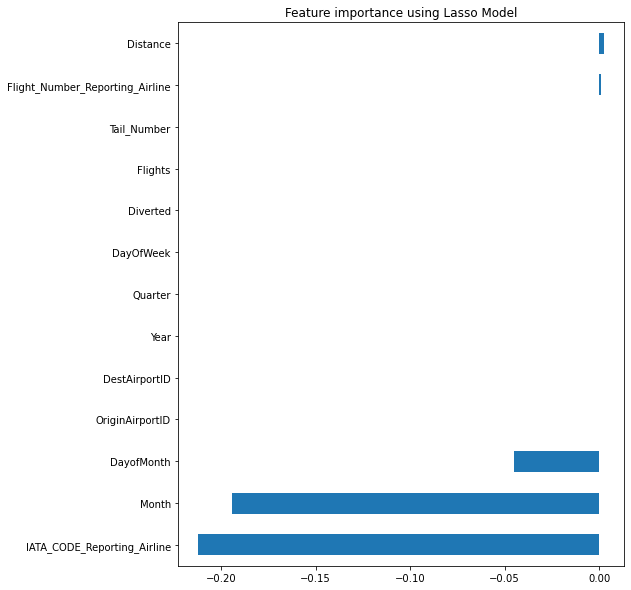

In [81]:
print("Feature Importance for Arrival Delays")
lasso_model(X_2017, y_2017_1)

Feature Importance for Depature Delays
Best alpha using built-in LassoCV: 1.574113
Best score using built-in LassoCV: 0.001266


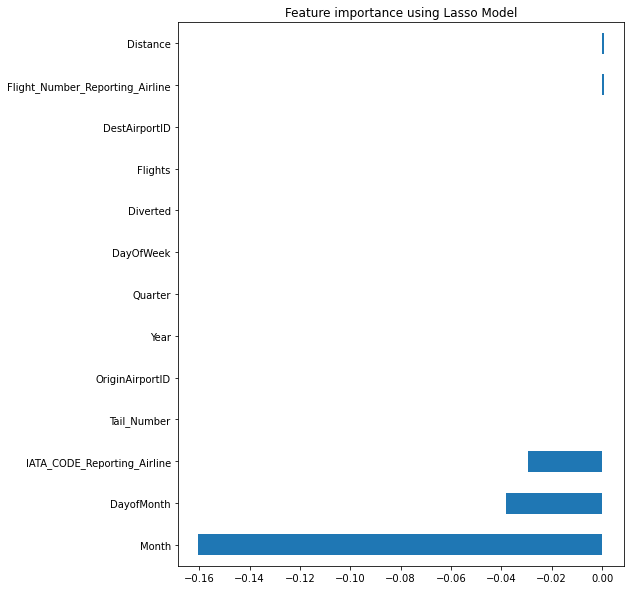

In [82]:
print("Feature Importance for Depature Delays")
lasso_model(X_2017, y_2017_2)

### 4. 2020 Data

In [61]:
sample_query = \
    """
        select *
        from delay 
        where year = 2020
    """

df_2020 = execute_query(connection, sample_query)

In [62]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688354 entries, 0 to 4688353
Data columns (total 33 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   Year                             int64 
 1   Quarter                          int64 
 2   Month                            int64 
 3   DayofMonth                       int64 
 4   DayOfWeek                        int64 
 5   FlightDate                       object
 6   DOT_ID_Reporting_Airline         int64 
 7   IATA_CODE_Reporting_Airline      object
 8   Tail_Number                      object
 9   Flight_Number_Reporting_Airline  object
 10  OriginAirportID                  int64 
 11  DestAirportID                    int64 
 12  CRSDepTime                       int64 
 13  DepTime                          int64 
 14  DepDelay                         int64 
 15  DepDelayMinutes                  int64 
 16  CRSArrTime                       int64 
 17  ArrTime                    

In [63]:
df_2020_small = df_2020.sample(frac=0.20, random_state=42)

In [64]:
df_2020_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937671 entries, 1370066 to 3952670
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Year                             937671 non-null  int64 
 1   Quarter                          937671 non-null  int64 
 2   Month                            937671 non-null  int64 
 3   DayofMonth                       937671 non-null  int64 
 4   DayOfWeek                        937671 non-null  int64 
 5   FlightDate                       937671 non-null  object
 6   DOT_ID_Reporting_Airline         937671 non-null  int64 
 7   IATA_CODE_Reporting_Airline      937671 non-null  object
 8   Tail_Number                      906632 non-null  object
 9   Flight_Number_Reporting_Airline  937671 non-null  object
 10  OriginAirportID                  937671 non-null  int64 
 11  DestAirportID                    937671 non-null  int64 
 12  CRSDepTim

In [65]:
X_2020, y_2020_1, y_2020_2 = prepare_data(df_2020_small)

Feature Importance for Arrival Delays
Best alpha using built-in LassoCV: 1.490699
Best score using built-in LassoCV: 0.003901


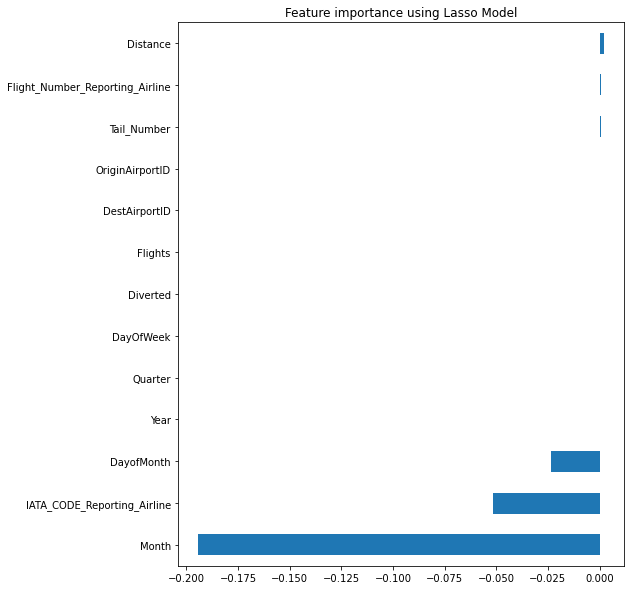

In [83]:
print("Feature Importance for Arrival Delays")
lasso_model(X_2020, y_2020_1)

Feature Importance for Depature Delays
Best alpha using built-in LassoCV: 1.430301
Best score using built-in LassoCV: 0.002201


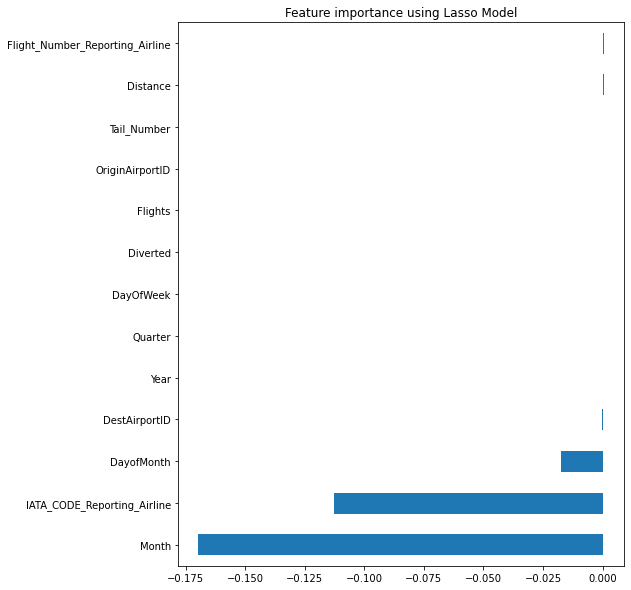

In [84]:
print("Feature Importance for Depature Delays")
lasso_model(X_2020, y_2020_2)

### 5. 2021 Data

In [69]:
sample_query = \
    """
        select *
        from delay 
        where year = 2021
    """

df_2021 = execute_query(connection, sample_query)

In [70]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5443512 entries, 0 to 5443511
Data columns (total 33 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   Year                             int64 
 1   Quarter                          int64 
 2   Month                            int64 
 3   DayofMonth                       int64 
 4   DayOfWeek                        int64 
 5   FlightDate                       object
 6   DOT_ID_Reporting_Airline         int64 
 7   IATA_CODE_Reporting_Airline      object
 8   Tail_Number                      object
 9   Flight_Number_Reporting_Airline  object
 10  OriginAirportID                  int64 
 11  DestAirportID                    int64 
 12  CRSDepTime                       int64 
 13  DepTime                          int64 
 14  DepDelay                         int64 
 15  DepDelayMinutes                  int64 
 16  CRSArrTime                       int64 
 17  ArrTime                    

In [71]:
df_2021_small = df_2021.sample(frac=0.20, random_state=42)

In [72]:
df_2021_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088702 entries, 3690524 to 974169
Data columns (total 33 columns):
 #   Column                           Non-Null Count    Dtype 
---  ------                           --------------    ----- 
 0   Year                             1088702 non-null  int64 
 1   Quarter                          1088702 non-null  int64 
 2   Month                            1088702 non-null  int64 
 3   DayofMonth                       1088702 non-null  int64 
 4   DayOfWeek                        1088702 non-null  int64 
 5   FlightDate                       1088702 non-null  object
 6   DOT_ID_Reporting_Airline         1088702 non-null  int64 
 7   IATA_CODE_Reporting_Airline      1088702 non-null  object
 8   Tail_Number                      1085997 non-null  object
 9   Flight_Number_Reporting_Airline  1088702 non-null  object
 10  OriginAirportID                  1088702 non-null  int64 
 11  DestAirportID                    1088702 non-null  int64 


In [73]:
X_2021, y_2021_1, y_2021_2 = prepare_data(df_2021_small)

Feature Importance for Arrival Delays
Best alpha using built-in LassoCV: 0.763280
Best score using built-in LassoCV: 0.001002


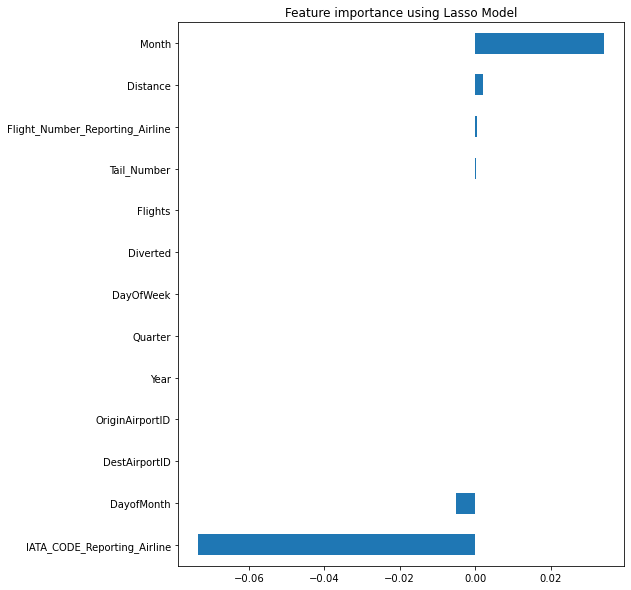

In [74]:
print("Feature Importance for Arrival Delays")
lasso_model(X_2021, y_2021_1)

Feature Importance for Depature Delays
Best alpha using built-in LassoCV: 0.786268
Best score using built-in LassoCV: 0.001070


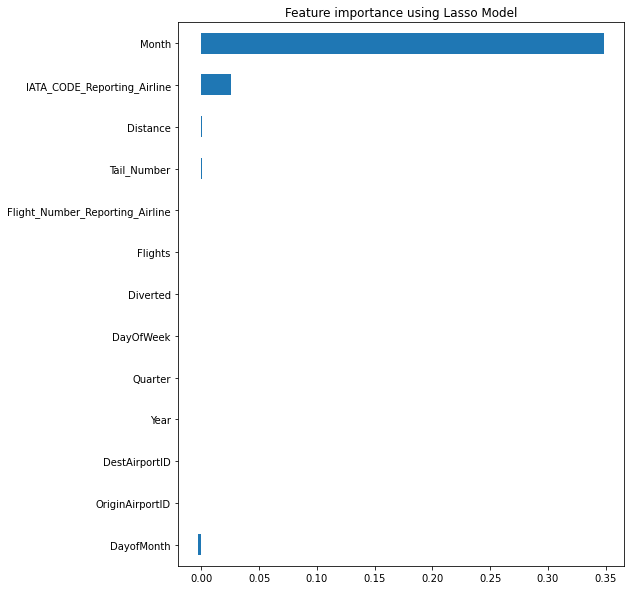

In [75]:
print("Feature Importance for Depature Delays")
lasso_model(X_2021, y_2021_2)